In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
user_reviews = pd.read_csv('/content/drive/MyDrive/Organización de Datos/TP1 - Visualizaciones/googleplaystore_user_reviews.csv')

In [4]:
user_reviews

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.53
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.29
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.88
4,10 Best Foods for You,Best idea us,Positive,1.00,0.30
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [5]:
user_reviews = user_reviews.dropna()
user_reviews = user_reviews[user_reviews.Sentiment != 'Neutral']

Elimino las apps que tengan una review o un sentiment NaN ya que no tiene sentido trabajar con estas (sentiment es Positive, Neutral o Negative, la polaridad va de -1 a 1 y la subjetividad de 0 a 1).
Mi idea en este ejercicio es comparar la subjetividad del sentimiento que tiene una review según si es positiva o negativa y sacar conclusiones respecto a esto. Elimino las apps con reviews neutrales para trabajar más simplemente.

Cambio nombre de columnas y traduzco las de la columna Sentiment para poder presentar el boxplot en español.

In [6]:
def mapear_a_español(cadena):
  traduccion = {
      'Positive': 'Positivo',
      'Negative': 'Negativo',
  }

  return traduccion.get(cadena)

user_reviews.Sentiment = user_reviews.Sentiment.map(mapear_a_español)


In [7]:
user_reviews.columns = ['App', 'Review', 'Sentimiento', 'Polaridad', 'Subjetividad']

In [8]:
user_reviews

,App,Review,Sentimiento,Polaridad,Subjetividad
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positivo,1.00,0.53
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positivo,0.25,0.29
3,10 Best Foods for You,Works great especially going grocery store,Positivo,0.40,0.88
4,10 Best Foods for You,Best idea us,Positivo,1.00,0.30
5,10 Best Foods for You,Best way,Positivo,1.00,0.30
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positivo,0.17,0.49
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positivo,0.23,0.45
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negativo,-0.29,0.25
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positivo,0.80,1.00


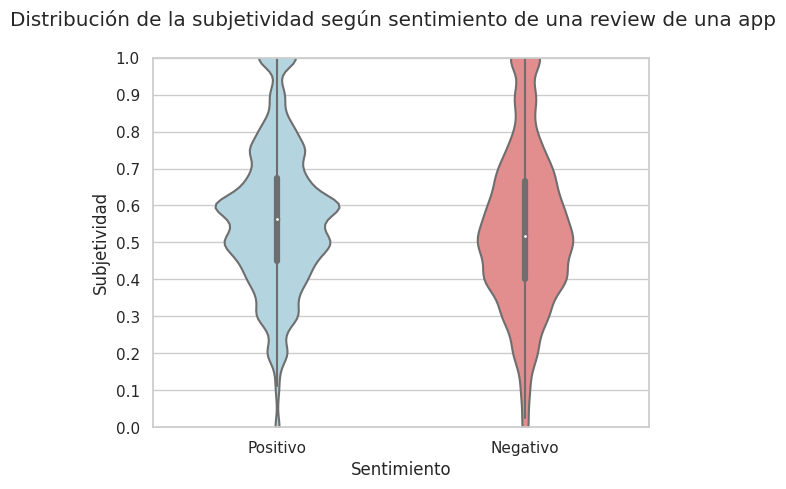

In [9]:
colors = {"Negativo": "lightcoral", "Positivo": "lightblue"}
bplot = sns.violinplot(x=user_reviews["Sentimiento"], y=user_reviews["Subjetividad"], palette=colors, width=0.5, fliersize=1.5)
bplot.set_ylim([0,1])

bplot.set_yticks(np.arange(0,1.1, 0.1))


plt.suptitle('Distribución de la subjetividad según sentimiento de una review de una app')
plt.show()

La idea de este plot era comparar la subjetividad del sentimiento que tiene una review según si es positiva o negativa. Uno podría pensar que si una review es negativa esta estaría más cargada de subjetividad, pero comparando los plots puede verse que no es así, y que incluso la subjetividad de las reviews positivas tienen mediana más grande que las negativas.

Además, la distribución de sentimiento positivo tiene "picos" y la de sentimiento negativos es más similar a la de una distrinución normal. Puede verse también que hay muy pocas reviews con subjetividad 0 y que en ambas hay un crecimiento acercándose al 1.